# * Foresight *

Implementing data to inform business decisions 

# Executive Summary

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market

In a world overwhelmed by choice, decision making and buying behaviour encompasses more than a well-executed great idea. Consumers are relying on their fellow consumers' experience and feedback, regarding a purchased product or service. Currently, the demand for reviews is such, that even shorts were created for consumers to perceive more reviews at a faster pace: Ratings! In the form of stars, points, thumbs up, etc. Together with text reviews, ratings have become pivotal in today's decision making and buying behaviour. 

Consequently, this becomes an important question from the business perspective, as it can help companies to understand the customer's current needs are, including costumer's profiling, target audience for certain types of Apps, and feedback for improving currently existing applications.

Ratings have become critical factor for an app to go viral. So, before one even spends time and money before I even spend on creating an app, it is important to know what consumers have already said about similar apps. Assimilating consumers' feedback into the creation of a mobile application, could arguably be what determines its success or failure. 

Foresight is a tool which uses machine learning techniques to investigate mobile apps ratings and help developers and investors to foresee potential issues with their mobile app design and execution. 


# Table of Contents:

1. Importing Libraries

2. Uploading data

3. Features

4. Data Cleaning 
    
5. Exploratory Data Analysis 

6. Data Visualization

7. Data Preparation 

8. Modelling

9. Evaluation

# 1. Importing Libraries
Uploading tools packages in order to perform the necessary data preparation and analysis 

In [1]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.figure_factory as ff
import seaborn as sns 
color = sns.color_palette()

# scikit-learn functions for predictive data analysis
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier

# Statistical functions
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import random

%matplotlib inline

from mlxtend.plotting import plot_decision_regions
# Binarising our target variable
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

# 2. Uploading Data
The dataset used in this project was obtained from Kaggle, and comprise a selection of mobile applications, their features, and their respective customers' ratings and reviews. 

In [2]:
data = pd.read_csv('googleplaystore.csv') # uploads the data in the notebook
x=data #attributes the data also to the value of x for future programming 
data.head() #shows the top 5 data rows and all columns in the data grid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Features
The features displyed in the data set include:  

1. App (name of the mobile application)
2. Category (apps' type of category, including art and design; photography; medical; etc)
3. Rating (1-5) 
4. Number of Reviews (amount of reviews in numbers) 
5. Size (siza of the app in Megabites)
6. Number of Insltallations (number of downloads)
7. Type (free or Paid)
8. Price (price range for each paid app)
9. Content Rating (Age Appropriate)
10. Genres (similar to category, the genre indicates what the app isdesign for: art and design; medical; etc.)
11. Last Update (the date in which the laterst version of the app was launched to the puclic)
12. Current Version (number of the current version)
13. Android Version (what android version the app is available for)

# 4. Cleaning and formatting Data
Apply preprocessing and curation to clean missing values, format data as Dummies

In [3]:
data.info() #shows the number of rows and columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape #identifies which columns have null values and how many there are

(10841, 13)

In [5]:
data.Rating.max()# exploring scores on the Rating category 

19.0


Whilst exploring the data, it was observed that the maximum score in the Rating category was 19. This contradicts the rating system, which establishes 5 as the maximim possible score.

In [6]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



There is a clear discrepancy with row 10472, hence the row was shifted to the right by one position.

In [7]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


# 4.1 Identifying which columns have null values and how many there are

In [8]:
data.isnull().sum() 

App                  0
Category             2
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
data["Category"].fillna("PHOTOGRAPHY", inplace = True) #As the name of the App clealry indicates which category it belongs to. 
data["Type"].fillna("Free", inplace = True) #As it is the most common type (over 92%)

# 4.2 Observing the remainder missing values 

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,2,0.000184
Genres,1,0.000092
Last Updated,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Type,0,0.000000
Installs,0,0.000000
Size,0,0.000000


# 4.3 Dropping rows with missing values

In [11]:
df1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 4.4 Assessing the number of paid vs free apps

In [12]:
print("Free Apps",len(df1[df1['Type'] == "Free"]))
print("Paid Apps",len(df1[df1['Type'] == "Paid"]))

Free Apps 8715
Paid Apps 645


# 4.5 checking for missing values 

In [13]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.6 Removing unnecessary signs and symbols from the dataset

In [14]:
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('k',''))
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('+',''))

In [15]:
df1['App'] = df1['App'].apply(lambda x: str(x).replace("?"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("&"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("'"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace("-"," "))
df1['App'] = df1['App'].apply(lambda x: str(x).replace(","," "))

In [16]:
df1["Category"]=[each.replace("_"," ") for each in df1.Category]
df1["Price"]=[each.replace("$"," ") for each in df1.Price]

In [17]:
df1.Installs = df1.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df1.Installs = df1.Installs.apply(lambda x: int(x))

# 4.7 Assessing values in the 'Android Version' feature

In [18]:
df1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

# 4.8 Reassessing missing values

In [19]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.9 Amending values to fit models

In [20]:
df1.Size=df1.Size.replace('Varies with device', df1.mean())
df1.Size=df1.Size.replace('1,000+',1000)

# 4.10 Coercing errors

In [21]:
df1.Reviews = pd.to_numeric(df1.Reviews, errors='coerce')
df1.Rating = pd.to_numeric(df1.Rating, errors='coerce')

In [22]:
df1.info()#reassessing the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


In [23]:
df2 = df1
df2.shape

(9360, 13)

In [24]:
df2.head()#observing features in the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid ScrapBook,ART AND DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide ...,ART AND DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,ART AND DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 4.11 Returning number of unique elements in the 'App' feature

In [25]:
df2.App.nunique()

8188

# 4.12 Excluding the features which will not be used in the predictive modelling algorithms

In [26]:
df2.drop(columns=['Android Ver', 'Current Ver', 'Last Updated'], inplace=True)

In [27]:
 df2_categorical = pd.get_dummies(df2, columns=['Category', 'Type', 'Genres', 'Content Rating'], drop_first=True) #Converting categorical variable into dummy/indicator variables.

In [28]:
df2_categorical.head()

,App,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14,500000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,U Launcher Lite – FREE Live Cool Themes Hide ...,4.7,87510,8.7,5000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch Draw Paint,4.5,215644,25,50000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4.13 Resetting index

In [29]:
df2_categorical.set_index(keys='App', inplace=True)
df2_categorical.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor Candy Camera Grid ScrapBook,4.1,159,19,10000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Coloring book moana,3.9,967,14,500000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
U Launcher Lite – FREE Live Cool Themes Hide Apps,4.7,87510,8.7,5000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Sketch Draw Paint,4.5,215644,25,50000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Pixel Draw Number Art Coloring Book,4.3,967,2.8,100000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4.14 Removing non-numerical items

In [30]:
df2_size_median = df2_categorical.loc[df2_categorical.Size!='Varies with device']
df2_size_median = df2_size_median.Size.median()

In [31]:
df2_categorical.loc[df2_categorical.Size == 'Varies with device', 'Size'] = df2_size_median

In [32]:
df2_categorical.describe()

,Rating,Reviews,Installs,Category_AUTO AND VEHICLES,Category_BEAUTY,Category_BOOKS AND REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,...,9360.00000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.007799,0.004487,0.019017,0.032372,0.006197,0.035043,0.020833,...,0.01688,0.000214,0.000321,0.008013,0.002991,0.792094,0.042415,0.049252,0.115812,0.000107
std,0.515263,3.145023e+06,9.126637e+07,0.087972,0.066840,0.136592,0.176995,0.078478,0.183898,0.142834,...,0.12883,0.014617,0.017901,0.089160,0.054615,0.405831,0.201544,0.216406,0.320016,0.010336
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
for col in df2_categorical.columns:
    print(col)
    print(df2_categorical[col].isna().sum())

Rating
0
Reviews
0
Size
0
Installs
0
Price
0
Category_AUTO AND VEHICLES
0
Category_BEAUTY
0
Category_BOOKS AND REFERENCE
0
Category_BUSINESS
0
Category_COMICS
0
Category_COMMUNICATION
0
Category_DATING
0
Category_EDUCATION
0
Category_ENTERTAINMENT
0
Category_EVENTS
0
Category_FAMILY
0
Category_FINANCE
0
Category_FOOD AND DRINK
0
Category_GAME
0
Category_HEALTH AND FITNESS
0
Category_HOUSE AND HOME
0
Category_LIBRARIES AND DEMO
0
Category_LIFESTYLE
0
Category_MAPS AND NAVIGATION
0
Category_MEDICAL
0
Category_NEWS AND MAGAZINES
0
Category_PARENTING
0
Category_PERSONALIZATION
0
Category_PHOTOGRAPHY
0
Category_PRODUCTIVITY
0
Category_SHOPPING
0
Category_SOCIAL
0
Category_SPORTS
0
Category_TOOLS
0
Category_TRAVEL AND LOCAL
0
Category_VIDEO PLAYERS
0
Category_WEATHER
0
Type_Paid
0
Genres_Action;Action & Adventure
0
Genres_Adventure
0
Genres_Adventure;Action & Adventure
0
Genres_Adventure;Brain Games
0
Genres_Adventure;Education
0
Genres_Arcade
0
Genres_Arcade;Action & Adventure
0
Genres_Arca

 # 5. Exploratory Data Analysis

In [34]:
df2.columns # Observing features for the exploratory data analysis

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

# 5.1 Checking for Muilticolinearity


Linear models analyses whether one or more predictor variables explain the dependent (criterion) variable. The regression has five key assumptions: Linear relationship, Multivariate normality, No or little multicollinearity, No auto-correlation, and Homoscedasticity. Moreover, the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

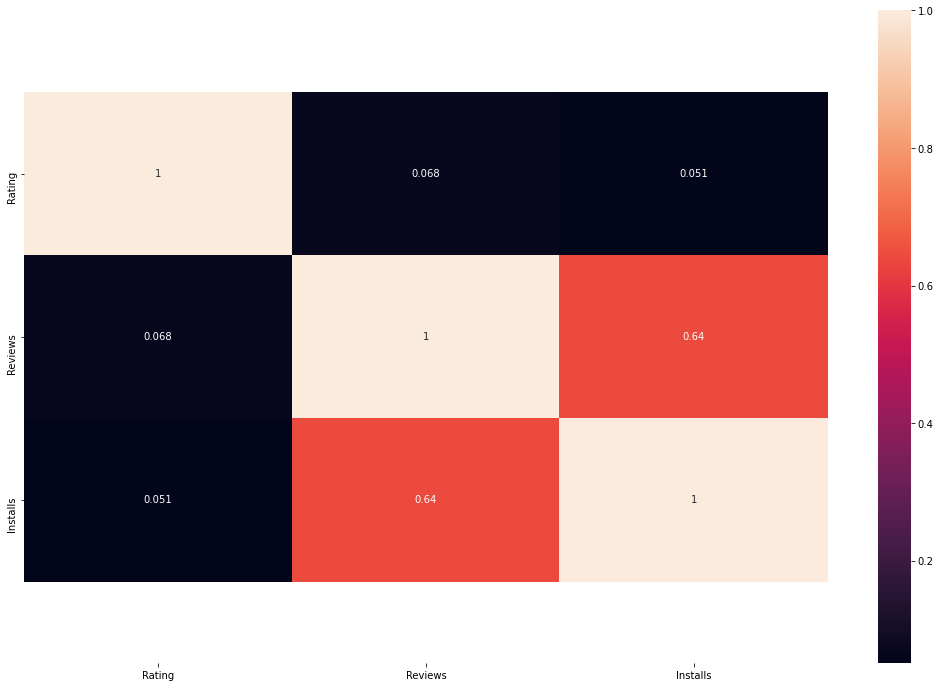

In [35]:
cor_df2 = df2.corr().nlargest(50, 'Rating')['Rating'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(df2[cor_df2].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 5.2 Correlation analysis 

In [36]:
print(df2.corr())

            Rating   Reviews  Installs
Rating    1.000000  0.068133  0.051337
Reviews   0.068133  1.000000  0.641605
Installs  0.051337  0.641605  1.000000


# 5.3 Dropping strongly correlated variables to avoid confounding effects


Linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

Multicollinearity may be tested with three central criteria:

Correlation matrix – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.

Tolerance – the tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as T = 1 – R² for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.

Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.

# 5.4 Correlation matrix

In [37]:
corr_matrix = df2.corr().abs()

# 5.5 Select upper triangle of correlation matrix

In [38]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 5.6 Find index of feature columns with correlation greater than 0.90

In [39]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [40]:
to_drop

[]


If multicollinearity is found in the data, centering the data (that is deducting the mean of the variable from each score) might help to solve the problem.  However, the simplest way to address the problem is to remove independent variables with high VIF values.Nevertheless, the Multicolinearity assumption was met in this occasion. 

# 6. Data visualization

# 6.1 Total number of Mobile Apps in Each Category

Text(0.5, 1.0, 'Total number of Mobile Apps in Each Category')

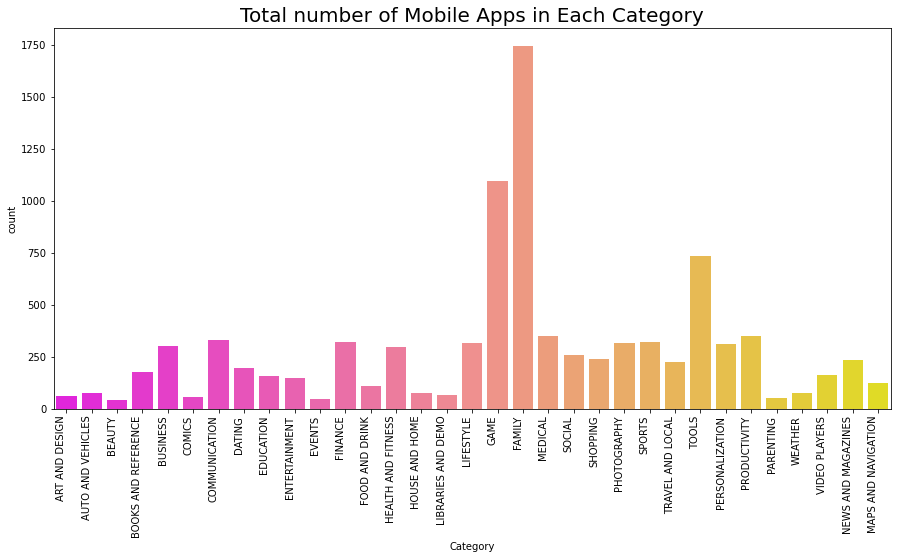

In [41]:
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df2, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('mobile_app_category.jpg')
category_plot 
plt.title('Total number of Mobile Apps in Each Category',size = 20)


It can be seen in the above graph, that the most popular App category is Family, and the least popular is the Events' Category. Amongst the most popular are Games, Medical, tools and photography.

# 6.2 Content Rating distribution

Text(0.5, 1.0, 'Content Rating distribution')

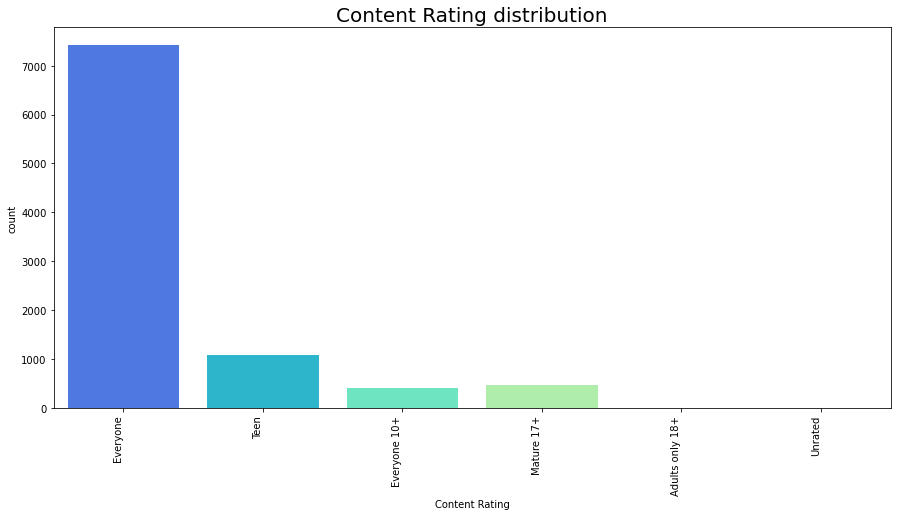

In [42]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df2, palette = "rainbow")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('Content_Rating_distribution.jpg')
content_plot 
plt.title('Content Rating distribution',size = 20)


Everyone, Teen Content Rating comprise the majority of ratings across all apps. Conversely, Unrated and Adults ony 18+ have account of the least amounts of ratings.

# 6.3 Number of Free Apps Vs Paid Apps 

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

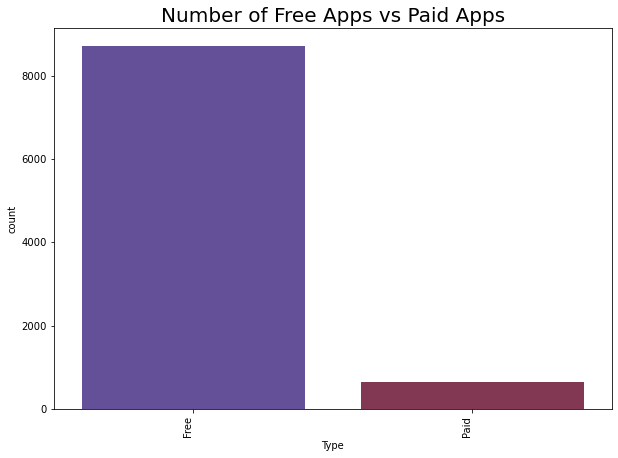

In [43]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df2, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('paid_free_apps.jpg')
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)


There is clear difference between the number of paid and free of charge apps. The number of free apps totals up to 7588, whereas the number of paid apps sums up to 602.

# 6.4 Charging Fees for Paid Apps

Text(0.5, 1.0, 'Charging Fees for Paid Apps')

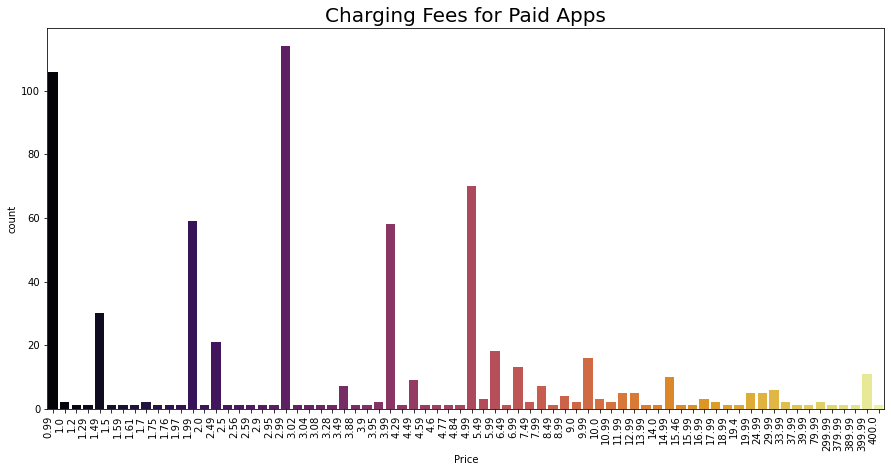

In [44]:
df2['Price'] = df2['Price'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df2[df2['Price'] != 0.0]
price_plot = sns.countplot(priced_apps['Price'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('charging_fees_apps.jpg')
price_plot 
plt.title('Charging Fees for Paid Apps',size = 20)


The above graph contains information specific to the Paid Apps type. There is a clear preference in price chosen for the paid apps. They include: 0.99, 2.99, 4.99, 1.99, and 3.99 US Dollars.

# 6.5 Installs Count Distribution

Text(0.5, 1.0, 'Installs Count Distribution')

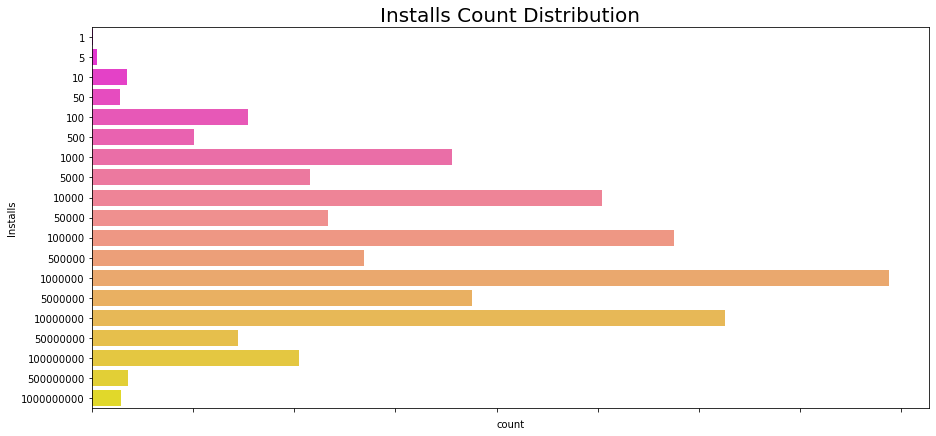

In [45]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df2, palette = "spring")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('installs_count.jpg')
install_plot 
plt.title('Installs Count Distribution',size = 20)


Most of the apps in the dataframe have 1 million installs followed by 10 million and 100k.

# 6.6 Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

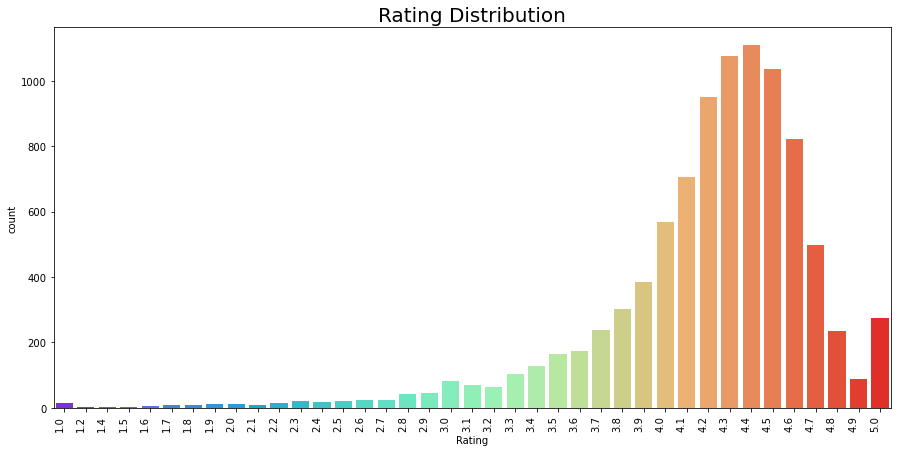

In [46]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df2, palette = "rainbow")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
plt.savefig('Rating_distribution.jpg')
plt.title('Rating Distribution',size = 20)


The Ratings distribution skewed to the left, with most of the apps are rated between 4.0 and 4.7.

# 6.7 Most Reviewed Apps at Google Play Store

Text(0.5, 1.0, 'Most Reviewed Apps at Google Play Store')

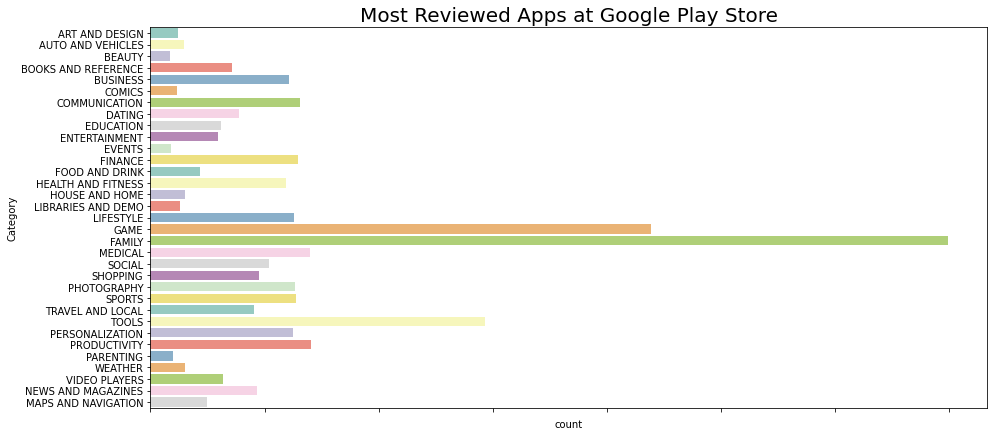

In [47]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=df2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.savefig('most_reviews_apps.jpg')
plt.title('Most Reviewed Apps at Google Play Store',size = 20)


Most reviewed apps are int he following App Categories: Family, Game, Tools, Finance, Lide style and medical apps. 

# 7. Data Preparation

# 7.1 Drop target variable

In [48]:
X=df2_categorical.drop('Rating',axis=1)
y=df2_categorical['Rating'].values.round()

In [49]:
X.shape, y.shape

((9360, 156), (9360,))

# 7.2 split data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# Train validation split
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=52)

# 7.3 Scalling 


Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms

In [52]:
scaler = StandardScaler()
scaler.fit(X_train_v)
X_train_v = scaler.transform(X_train_v)
X_val = scaler.transform(X_val)

In [53]:
X_test = scaler.transform(X_test)

# 8. Modelling

In [54]:
y_train_v

array([4., 4., 5., ..., 4., 5., 4.])

# 8.1 Running Baseline Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Logistic Regression is a Machine Learning algorithm which is used for the classification problems, Multi-linear functions failsClass (eg. ratings and categories); it is a predictive analysis algorithm and based on the concept of probability. Its output using the logistic sigmoid function to return a probability value.

In [55]:
model_baseline = LogisticRegression(penalty='none', solver='lbfgs')
model_baseline.fit(X_train_v,
                   y_train_v)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 8.2 Evaluating Baseline Model

In [56]:
y_val_pred = model_baseline.predict(X_val)
y_train_pred = model_baseline.predict(X_train_v)

print("Accuracy of model on training =", round(accuracy_score(y_train_v, y_train_pred),3))
print("Accuracy of model on validation =", round(accuracy_score(y_val, y_val_pred),3))

Accuracy of model on training = 0.725
Accuracy of model on validation = 0.716



The above consists of an evaluation of the baseline model regarding the accuracy of model on the training dataset and the model validation dataset. It can be seen that the accuracy of the model on the training data is 0.725; whereas the model's accuracy on the validation data is 0.716.

# 8.3 Adding Regularization (L1 Penalty)


Regularization is necessary because least squares regression methods, where the residual sum of squares is minimized, can be unstable. This is especially true if there is multicollinearity in the model. However, the mere practice of model fitting comes with a major pitfall: any set of data can be fitted to a model, even if that model is ridiculously complex.

L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients)

In [57]:
model_baseline_L1 = LogisticRegression(penalty='l1', solver='liblinear')
model_baseline_L1.fit(X_train_v,y_train_v)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# 8.4 Evaluating Model

In [58]:
y_val_pred = model_baseline_L1.predict(X_val)
y_train_pred = model_baseline_L1.predict(X_train_v)

print("Accuracy of model on training =", round(accuracy_score(y_train_v, y_train_pred),3))
print("Accuracy of model on validation =", round(accuracy_score(y_val, y_val_pred),3))

Accuracy of model on training = 0.725
Accuracy of model on validation = 0.715


 
The above consists of an evaluation of the baseline model regarding the accuracy of model on the training dataset and the model validation dataset, using the L1 Penalty. It can be seen that the accuracy of the model on the training data is 0.725; whereas the model's accuracy on the validation data is 0.715. Hence, it did not improve the model.

# 8.5 Adding Regularization (L2 Penalty)


L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated). Ridge regression and SVMs use this method.

In [59]:
model_baseline_L2 = LogisticRegression(penalty='l2', solver='lbfgs')
model_baseline_L2.fit(X_train_v,y_train_v)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 8.6 Model Evaluation 

In [60]:
y_val_pred = model_baseline_L2.predict(X_val)
y_train_pred = model_baseline_L2.predict(X_train_v)

print("Accuracy of model on training =", round(accuracy_score(y_train_v, y_train_pred),3))
print("Accuracy of model on validation=", round(accuracy_score(y_val, y_val_pred),3))

Accuracy of model on training = 0.726
Accuracy of model on validation= 0.716



The above consists of an evaluation of the baseline model regarding the accuracy of model on the training dataset and the model validation dataset, using the L2 Penalty. It can be seen that the accuracy of the model on the training data is 0.726; whereas the model's accuracy on the validation data is 0.716. Thus, it did not seemd to have improved the model so much. 

# 8.7 Logistic Regression with cross-validation using GridSearchCV


There are ways in which it is possible to improve classification models. One such a way is to apply cross-validation using GridSearchCV. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Grid search is a very traditional technique for implementing hyperparameters. It brute force all combinations. Grid search requires to create two set of hyperparameters: 1) Learning Rate; and 2)Number of Layers. 
Grid search trains the algorithm for all combinations by using the two set of hyperparameters (learning rate and number of layers) and measures the performance using “Cross Validation” technique. This validation technique gives assurance that our trained model got most of the patterns from the dataset. One of the best methods to do validation by using “K-Fold Cross Validation” which helps to provide ample data for training the model and ample data for validations.


In [61]:
logistic = LogisticRegression(multi_class='auto')
param_grid = {'penalty':['l1','l2']}

In [62]:
cv_logistic = GridSearchCV(logistic, param_grid, cv=5)

In [63]:
cv_logistic.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [64]:
best_model = cv_logistic.best_estimator_

# 8.8 Best Penalty Paradigm 

In [65]:
print('Best Penalty:', best_model.get_params()['penalty'])

Best Penalty: l2


In [66]:
print('Best Score:', cv_logistic.best_score_)

Best Score: 0.7176821823442167


In [67]:
cv_logistic.best_params_

{'penalty': 'l2'}


Results showed that the L1 penalty model performed better than the L2 model (0.726).

# 8.9 Decision Tree Classifier 


Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. Of course for higher-dimensional data, these lines would generalize to planes and hyperplanes.
Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage.

# 8.10 Running Decision Tree Classifier

In [68]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_v,y_train_v)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [69]:
y_val_pred = model_dt.predict(X_val)
y_train_pred = model_dt.predict(X_train_v)

In [70]:
print("Accuracy of model on training =", round(accuracy_score(y_train_v, y_train_pred),3))
print("Accuracy of model on validation=", round(accuracy_score(y_val, y_val_pred),3))

Accuracy of model on training = 1.0
Accuracy of model on validation= 0.666



The above consists of an evaluation of the Decision Tree Classifier model. It can be seen that the accuracy of the model on the training data is 1.0, hence highly overfitted. The model's accuracy reported on the validation data is 0.666.

# 7.11 Hyper Parameterization - Part I

 
As the Decision Tree model seems to be overfitting, hyper Paramentization will beused in order to tune the model. Hyperparameters are the properties that govern the entire training process. Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [71]:
skf = StratifiedKFold(n_splits=5,random_state=42)

In [72]:
param_grid = {'max_depth':range(10,50+1,10),'min_samples_leaf':[5,10,15,20]}

In [73]:
model_dt_tuned = GridSearchCV(model_dt,param_grid,cv=skf,scoring='accuracy',return_train_score=True,n_jobs=-1)

In [74]:
model_dt_tuned.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [75]:
model_dt_tuned.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

# 8.12 Accuracy on Validation

In [76]:
print('Accuracy on validation set:', round(model_dt_tuned.best_score_,3))

Accuracy on validation set: 0.73



After tuning the parameters using min samples leaf, the accuracy on validation dataset is 0.73. 

In [77]:
pd.DataFrame(model_dt_tuned.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.185704,0.002309,0.018947,0.001092,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.728972,0.713618,0.732977,...,0.722622,0.009867,8,0.781636,0.780467,0.779466,0.788182,0.780337,0.782018,0.003159
1,0.182709,0.026063,0.017952,0.001409,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.730307,0.713618,0.732310,...,0.725695,0.006622,7,0.766778,0.766945,0.765776,0.771991,0.764647,0.767227,0.002520
2,0.190489,0.014217,0.017553,0.001018,10,15,"{'max_depth': 10, 'min_samples_leaf': 15}",0.732977,0.718291,0.728304,...,0.725961,0.005329,6,0.759098,0.760935,0.758097,0.762310,0.762978,0.760684,0.001853
3,0.188097,0.018580,0.018350,0.002863,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",0.730975,0.730307,0.736315,...,0.730101,0.005735,1,0.755092,0.756761,0.754591,0.754131,0.756969,0.755509,0.001150
4,0.261701,0.012241,0.017753,0.001462,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.700935,0.688919,0.708278,...,0.692839,0.011045,17,0.819032,0.819533,0.818698,0.821065,0.818060,0.819277,0.001014
5,0.216021,0.009088,0.017553,0.001196,20,10,"{'max_depth': 20, 'min_samples_leaf': 10}",0.717623,0.706943,0.716956,...,0.711404,0.004861,13,0.777462,0.779466,0.779132,0.777833,0.779836,0.778746,0.000931
6,0.208442,0.018616,0.020545,0.003432,20,15,"{'max_depth': 20, 'min_samples_leaf': 15}",0.726302,0.716956,0.722296,...,0.721020,0.004458,9,0.762104,0.766945,0.765776,0.762477,0.766483,0.764757,0.002052
7,0.265491,0.029367,0.020146,0.001934,20,20,"{'max_depth': 20, 'min_samples_leaf': 20}",0.726302,0.726969,0.731642,...,0.727564,0.004888,2,0.756093,0.759766,0.760267,0.754131,0.759139,0.757879,0.002370
8,0.266887,0.026179,0.019147,0.002476,30,5,"{'max_depth': 30, 'min_samples_leaf': 5}",0.695594,0.687583,0.692924,...,0.688166,0.008484,18,0.821035,0.820367,0.824541,0.824236,0.821733,0.822382,0.001697
9,0.279851,0.028586,0.025332,0.009326,30,10,"{'max_depth': 30, 'min_samples_leaf': 10}",0.717623,0.701602,0.714286,...,0.710069,0.005518,14,0.777462,0.779800,0.780134,0.777833,0.779836,0.779013,0.001127


# 8.13 Hyper Parameterization - Part II

In [78]:
param_grid = {'max_depth':range(15,25+1,1),'min_samples_leaf':[3,4,5,6,7]}

In [79]:
model_dt_tuned_2 = GridSearchCV(model_dt,param_grid,cv=skf,scoring='accuracy',return_train_score=True,n_jobs=-1)

In [80]:
model_dt_tuned_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [81]:
model_dt_tuned_2.best_params_

{'max_depth': 15, 'min_samples_leaf': 4}

# 8.14 Assessing Accuracy of Validation 

In [82]:
print('Accuracy on validation set:', round(model_dt_tuned_2.best_score_,3))

Accuracy on validation set: 0.712


 
After tuning, the model's performance is 0.712. Thus not improving the performance of the model. 

# 8.15 Random Forest Classifier 


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set. 
Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow overfitting trees in the model.

# 8.16 Running Random Forest Classifier

In [83]:
model_rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42)
model_rf.fit(X_train_v,y_train_v)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
y_val_pred = model_rf.predict(X_val)
y_train_pred = model_dt.predict(X_train_v)

In [85]:
accuracy_score(y_val,y_val_pred)

0.7316421895861148

In [86]:
accuracy_score(y_train_v, y_train_pred)

1.0

 
This model is overfitting. 

# 8.17 Hyper parameterization - Part I

In [87]:
skf = StratifiedKFold(n_splits=5,random_state=42)

In [88]:
param_grid = {'max_depth':range(10,50+1,10),'min_samples_leaf':[5,10,15,20]}

In [89]:
model_rf_tuned = GridSearchCV(model_rf, param_grid, cv=skf, scoring='accuracy',return_train_score=True,n_jobs=-1)

In [90]:
model_rf_tuned.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                             

In [91]:
model_rf_tuned.best_params_

{'max_depth': 50, 'min_samples_leaf': 5}

# 8.17 Accuracy on Validation 

In [92]:
print('Accuracy on validation set:', round(model_rf_tuned.best_score_,3))

Accuracy on validation set: 0.737



After tuning, fitting has improved to 0.737. So far, this is the best performing model. 

In [93]:
pd.DataFrame(model_rf_tuned.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.689756,0.124663,0.260504,0.108161,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.731642,0.730975,0.729640,...,0.731437,0.002943,9,0.735893,0.737730,0.736728,0.734769,0.739442,0.736912,0.001596
1,0.701127,0.224530,0.188296,0.058789,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.728304,0.729640,0.727637,...,0.728633,0.001428,14,0.731052,0.735392,0.731553,0.729594,0.736271,0.732772,0.002594
2,0.668216,0.115478,0.187098,0.056787,10,15,"{'max_depth': 10, 'min_samples_leaf': 15}",0.727637,0.726969,0.725634,...,0.725293,0.001905,19,0.730217,0.732220,0.730718,0.722417,0.730596,0.729234,0.003476
3,0.645873,0.129719,0.191488,0.061651,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",0.721629,0.725634,0.721629,...,0.722088,0.001862,20,0.724374,0.729883,0.727880,0.720247,0.727758,0.726028,0.003389
4,0.823398,0.101214,0.268084,0.045241,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.738318,0.729640,0.728972,...,0.735177,0.006137,4,0.744908,0.746745,0.745075,0.744784,0.748790,0.746060,0.001539
5,0.882241,0.066061,0.296408,0.025879,20,10,"{'max_depth': 20, 'min_samples_leaf': 10}",0.734312,0.731642,0.729640,...,0.733441,0.004338,7,0.739399,0.741569,0.739900,0.737606,0.739943,0.739684,0.001270
6,0.759569,0.096390,0.167752,0.071351,20,15,"{'max_depth': 20, 'min_samples_leaf': 15}",0.730975,0.726302,0.730307,...,0.729701,0.002264,13,0.736227,0.737896,0.737229,0.731097,0.736939,0.735878,0.002450
7,0.791285,0.083336,0.248536,0.077431,20,20,"{'max_depth': 20, 'min_samples_leaf': 20}",0.729640,0.727637,0.727637,...,0.727430,0.002479,16,0.732387,0.736394,0.732387,0.726256,0.732599,0.732005,0.003254
8,0.927319,0.142033,0.293016,0.094225,30,5,"{'max_depth': 30, 'min_samples_leaf': 5}",0.739653,0.731642,0.731642,...,0.736379,0.004869,3,0.744741,0.748748,0.747412,0.747955,0.754131,0.748598,0.003077
9,0.826391,0.027871,0.229985,0.064485,30,10,"{'max_depth': 30, 'min_samples_leaf': 10}",0.734980,0.730307,0.728304,...,0.733174,0.005001,8,0.740234,0.741569,0.740401,0.737106,0.739943,0.739851,0.001480


# 8.18 Hyper parameterization - Part II

In [94]:
skf = StratifiedKFold(n_splits=5,random_state=42)

In [95]:
param_grid = {'max_depth':range(35,45+1,1),'min_samples_leaf':[3,4,5,6,7]}

In [96]:
model_rf_grid = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy',return_train_score=True,n_jobs=-1)

In [97]:
model_rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [98]:
model_rf_grid.best_params_

{'max_depth': 41, 'min_samples_leaf': 3}

In [99]:
model_rf_tuned_2 = model_rf_grid.best_estimator_

# 8.19 Accuracy on Validation 

In [100]:
print('Accuracy on validation set:', round(accuracy_score(y_val, model_rf_tuned_2.predict(X_val)),3))

Accuracy on validation set: 0.214



This hyper paramenters seems to deteriorate the performance of the model, and it is unable to compute the pd.DataFrame(model_rf_tuned_2.cv_results_) function. 

# 8.20 AdaBoost Classifier 


AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm, which can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier. When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on harder-to-classify examples.

# 7.21 Running AdaBoost Model 

In [101]:
model_ada = AdaBoostClassifier(model_rf,random_state=42)
model_ada.fit(X_train_v,y_train_v)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [102]:
y_val_pred = model_ada.predict(X_val)

In [103]:
accuracy_score(y_val, y_val_pred)

0.7202937249666221


The AdaBoost model performs well, but does not add anything to the best previous scores to the best random forest performing model. There was an attempt to tune the above AdaBoost model, with a range of learning rates. Yet, it was too computationally expensive.

# 9. Evaluation


Final Model - Test Set


The tuned random forest (Hyper Parametization - Part I), was selected as best fitting model. Below, are the scores for the test set. 

In [104]:
y_test_pred = model_rf_tuned.predict(X_test)
accuracy_score(y_test,y_test_pred)

print("Accuracy of model on test set =", round(accuracy_score(y_test,y_test_pred),3))

Accuracy of model on test set = 0.235


In [105]:
feature_importances = pd.DataFrame(model_rf_tuned.feature_importances_)
feature_importances[1] = X.columns

feature_importances= feature_importances.sort_values(by=0, ascending=False).head(20)
feature_importances

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

# 9.1 Feature Importance Bar chart 

In [ ]:
fig = plt.figure(figsize=(18,12))
sns.barplot(feature_importances[1][:10], feature_importances[0][:10])
plt.title('Feature Importances Bar Chart', fontsize=16, fontweight='bold')
plt.ylabel('Feature Importances', fontsize=12)
plt.ylim(0)
plt.xlabel('Features', fontsize=12)
plt.show()

# 9.2 Binary Model - OneVsRestClassifier

In [ ]:
multi_model_rf = OneVsRestClassifier(model_rf)
multi_model_rf.fit(X_train_v,y_train_v)
y_score = multi_model_rf.predict_proba(X_test)
# structures
fpr = dict()
tpr = dict()
roc_auc = dict()
threshold = dict()
# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i, label in zip(range(3),['Category', 'Size', 'Installs']):
    fpr[label], tpr[label], threshold[label] = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])
# roc for each class
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
for i,label in zip(range(3),['Category', 'Size', 'Installs']):
    ax.plot(fpr[label], tpr[label], label='ROC curve (area = {}) for {}'.format(round(roc_auc[label],3), label))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

In [ ]:
y_score_df = pd.DataFrame(y_score)
y_score_df.rename(columns={0: "functional", 1: "functional needs repair", 2:"non functional"}, inplace=True)

In [ ]:
a = list(y_score_df.idxmax(axis=1))

In [ ]:
b = list(y_test_pred)

In [ ]:
accuracy_score(y_test,b)

# 9.3 Confusion Matrix 

In [ ]:
rdf_pred=model_ada.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Fine-tuned Random Forest Model - Confusion matrix (test_data) \n x-axis : predicted; y-axis : true")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False, linewidths=0.3)
plt.savefig('final_conf_matrix.jpg')
print('RandomForest_accuracy:',rdf_ac)

# 9.4 Error bars - Feature importances

In [ ]:
fig = plt.figure(figsize=(18,12))
sns.barplot(feature_importances[1][:10], feature_importances[0][:10], yerr=np.std(feature_importances[0][:10]))
plt.title('Feature Importances Bar Chart', fontsize=16, fontweight='bold')
plt.ylabel('Feature Importances', fontsize=12)
plt.ylim(0)
plt.xlabel('Features', fontsize=12)
plt.show()

In [ ]:
df2.head()

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df2[:1000], x='Category', hue='Content Rating')
plt.show()